In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

def chi_2(predicted, observed, errors):
    return np.sum(((observed-predicted) / errors) ** 2)

def red_chi_2(predicted, observed, errors, DoF):
    return np.sum(((observed-predicted) / errors) ** 2) / DoF

def model(x, m, b):
    return m * x + b


In [3]:
pwr = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
nA = np.array([0, 0, 0, 0, 0, 0, 0, 4, 45, 327, 569, 767, 967, 980, 1140, 1280, 1395, 1517, 1626, 1713, 1797, 1875, 1943, 1955, 2019, 2079, 2148, 2196, 2261, 2308, 2374, 2407])


In [4]:
pwr_ind = np.array([0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 30, 35, 40, 45])
lux = np.array([2, 2, 4, 26, 153, 645, 1940 , 4200 , 7190 , 7510 , 10900 , 18067 , 25800 , 41100 , 55900 , 73800 , 87000])


In [5]:
intensity_interp = interp1d(pwr_ind, lux, kind="linear")

start_pwr = 0
stop_pwr = 45
step_size = 1
pwr_reg = np.arange(start_pwr, stop_pwr, step_size)

intensity = intensity_interp(pwr_reg)


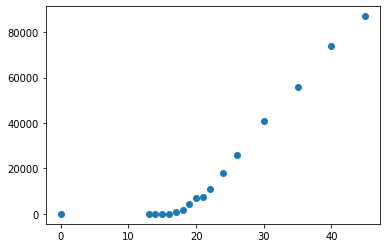

In [6]:
plt.scatter(pwr_ind, lux)

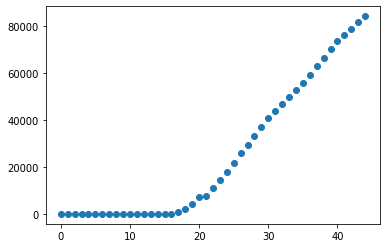

In [7]:
plt.scatter(pwr_reg, intensity)

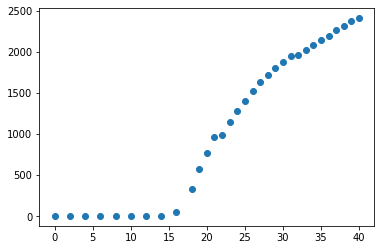

In [8]:
plt.scatter(pwr, nA)

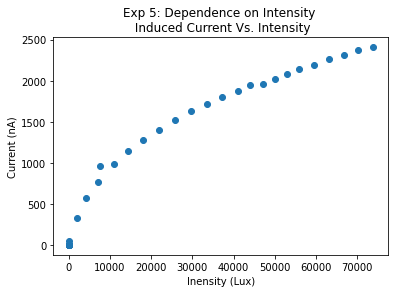

In [9]:
plt.title("Exp 5: Dependence on Intensity \n Induced Current Vs. Intensity")
plt.xlabel("Inensity (Lux)")
plt.ylabel("Current (nA)")
plt.scatter(intensity[pwr], nA)

In [13]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(model, intensity[pwr], nA, p0=init_params)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))


383.11245327198014

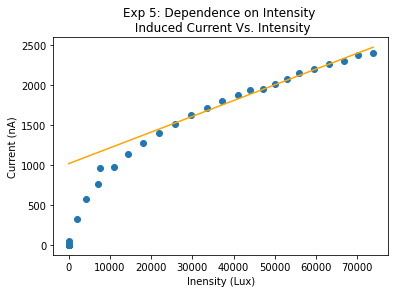

In [29]:
x_space = np.linspace(intensity[pwr[0]], intensity[pwr[-1]])
plt.title("Exp 5: Dependence on Intensity \n Induced Current Vs. Intensity")
plt.xlabel("Inensity (Lux)")
plt.ylabel("Current (nA)")
plt.scatter(intensity[pwr], nA)
plt.plot(x_space, model(x_space, m, b), color="orange")
red_chi_2(model(intensity[pwr], m, b), nA, 30, len(nA) - 2)

In [24]:
# Does the fit
init_params=[0, 0]
lin_opt, lin_cov = opt.curve_fit(model, intensity[pwr[15:]], nA[15:], p0=init_params)

# Best fit values
m, b = lin_opt
dm, db = np.sqrt(np.diag(lin_cov))


1.0499769373380752

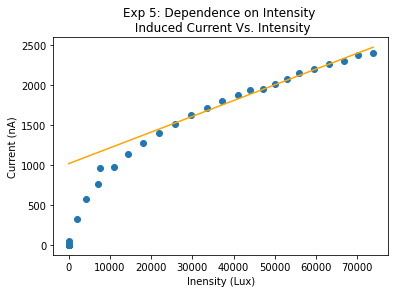

In [30]:
x_space = np.linspace(intensity[pwr[0]], intensity[pwr[-1]])
plt.title("Exp 5: Dependence on Intensity \n Induced Current Vs. Intensity")
plt.xlabel("Inensity (Lux)")
plt.ylabel("Current (nA)")
plt.scatter(intensity[pwr], nA)
plt.plot(x_space, model(x_space, m, b), color="orange")
red_chi_2(model(intensity[pwr[15:]], m, b), nA[15:], 30, len(nA) - 2)
